#  RESEARCH PROJECT B
Student: Mr Eloy Ruiz Donayre  
Supervisor: Prof Dr Achim Kehrein  

Reference Paper:  
> To sleep or not to sleep: the ecology of sleep in artificial organisms  
> Alberto Acerbi, Patrick McNamara and Charles L Nunn  
> https://doi.org/10.1186/1472-6785-8-10 

## Testing a full experiment (15 generations)

### Setting up modules

In [1]:
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()

In [2]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from agents import Animal, FoodPatch, SleepPatch
from model import SleepAnimals
from experiment import *

In [3]:
current_exp_id = 0
generation_number = 0
abm_models = []
generations = []
results = pd.DataFrame()
p = 0.05

### Creating genomes of initial population
The array `genomes` represent the genomes of the first 100 individuals. Each gene in the genome has three possible values:  
`'flex' , 'eat' , 'sleep'`

In [4]:
genomes = genome_alternatives(100)
np.shape(genomes)
selected_genomes = genomes

(100, 24)

##### Executing 15 generations

In [5]:
for run_generations in range (15):
    # Creating the Agent-Based models for the current generation and running it for 7 days.
    for current_exp_id in range(100*generation_number + 0, 100*generation_number + 100):
        i = current_exp_id
        abm_models.append( SleepAnimals(i, genome=selected_genomes[i-100*generation_number], 
                                        width=40, height=40) )
        for j in range(60*24*7):
            abm_models[i].step()
    
    # Capturing the data from the end of the simulation
    current_generation = []
    for i in range(100*generation_number + 0, 100*generation_number + 100):
        a = [ abm_models[i].model_id , abm_models[i].schedule.agents[0].fitness , 
             abm_models[i].schedule.agents[0].circadian_rythm ]
        current_generation.append( a )
    
    generation_results = dataframe_generation(generation_number , current_generation)
    results = results.append(generation_results)
    current_generation.sort(key = lambda x : x[1], reverse=True)
    generation_number += 1
    generations.append( current_generation )
    
    # Generating the new population from the fittest individuals
    selected_genomes = np.full( (100 , 24) , 'sleep')
    for i in range(20):
        for j in range(5):
            for k in range(24):
                a = current_generation[i][2][k]
                a = mutation_gene( a , p )
                selected_genomes[int(100/20)*i + j] [k] = a

In [6]:
generation_number , current_exp_id

(10, 999)

### Some results

#### 1st generation data

This are the models with the highest fitness in the first generation:

In [21]:
gen1_mostfit = [ generations[0][0][0] , generations[0][1][0], generations[0][2][0], 
               generations[0][3][0] , generations[0][4][0]]
gen1_mostfit

[64, 94, 47, 33, 85]

This shows the genome of the 10 most fit individuals of the first generation, color coded (Green = Eat genome, Lila = Sleep genome, Light blue = flexible genome)

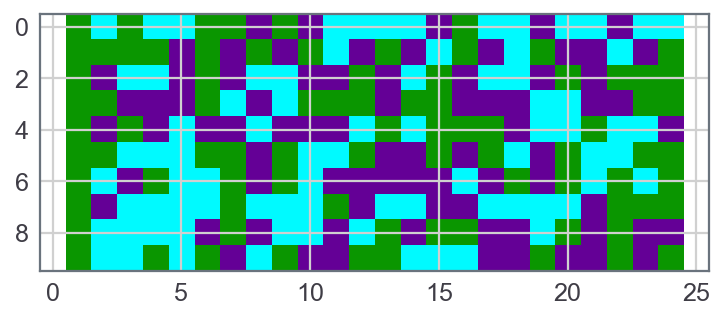

In [22]:
genome_display_1gen = displayRGB_generation(1, 10, generations)
_ = plt.imshow(np.swapaxes(genome_display_1gen,0,1))

Plotting the "Fitness vs Timestep" of the five most fit agents.

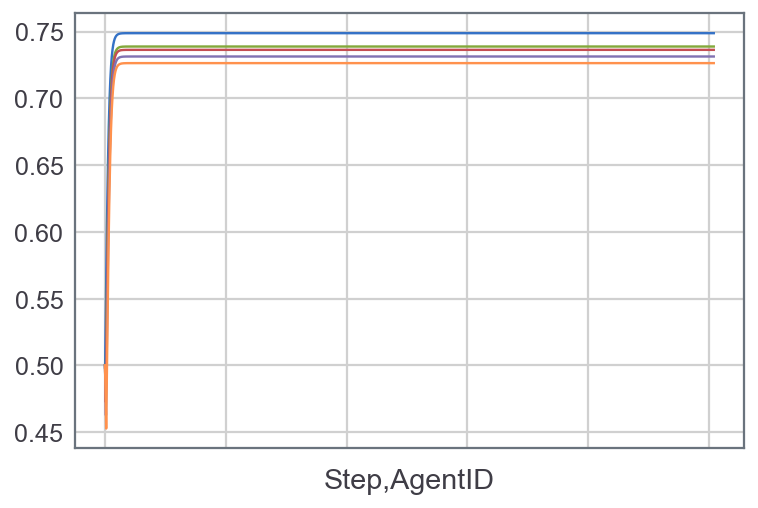

In [23]:
results_1stgen_1st = abm_models[gen1_mostfit[0]].datacollector.get_agent_vars_dataframe()
results_1stgen_2st = abm_models[gen1_mostfit[1]].datacollector.get_agent_vars_dataframe()
results_1stgen_3rd = abm_models[gen1_mostfit[2]].datacollector.get_agent_vars_dataframe()
results_1stgen_4th = abm_models[gen1_mostfit[3]].datacollector.get_agent_vars_dataframe()
results_1stgen_5th = abm_models[gen1_mostfit[4]].datacollector.get_agent_vars_dataframe()
_ = results_1stgen_1st.Fitness.plot()
_ = results_1stgen_2st.Fitness.plot()
_ = results_1stgen_3rd.Fitness.plot()
_ = results_1stgen_4th.Fitness.plot()
_ = results_1stgen_5th.Fitness.plot()

Dataframe of the 1st generation showing: 20 most fit agents, fitness in the last step and genome.

In [7]:
results.loc['1st'].nlargest(20,'fitness')

u_id   fitness  1  2  3  4  5  6  7  8 ... 15 16 17 18 19 20 21  \
individual                                         ...                        
066           65  0.743751  S  S  F  F  E  S  E  E ...  F  F  E  E  E  F  E   
080           79  0.742502  S  S  F  F  E  S  F  S ...  F  E  F  F  S  S  S   
095           94  0.741254  S  F  E  S  S  F  S  E ...  F  F  S  F  E  F  E   
004            3  0.740005  S  E  E  F  F  S  E  F ...  E  S  F  E  F  F  E   
056           55  0.738758  S  E  E  F  E  F  S  F ...  E  E  E  F  E  S  E   
019           18  0.735018  S  S  E  E  F  F  S  S ...  F  E  S  E  S  F  S   
081           80  0.735018  S  E  F  E  S  E  S  F ...  S  E  E  E  F  F  S   
094           93  0.730043  S  F  E  E  E  F  E  E ...  E  S  E  S  F  S  F   
045           44  0.728801  S  F  F  E  E  E  S  F ...  E  E  E  E  F  E  F   
026           25  0.721376  S  F  F  S  S  E  S  E ...  S  F  F  F  E  S  E   
069           68  0.721376  S  E  F  F  F  S  E  E ...  E  E  F  F  S  S  F   
010            9  0.699456  S  E  F  F  F  F  F  F ...  E  S  E  S  E  S  E   
061           60  0.682932  S  S  E  F  S  E  S  S ...  F  F  F  E  F  E  F   
014           13  0.679466  S  F  E  F  S  S  S  S ...  E  E  S  E  E  E  F   
041           40  0.678317  S  S  E  E  S  E  E  F ...  E  E  S  F  S  S  F   
051           50  0.677172  S  E  S  E  E  S  S  E ...  S  F  S  F  S  F  S   
067           66  0.672623  S  F  E  E  S  E  S  S ...  E  E  F  E  E  E  S   
006            5  0.663696  S  S  E  S  E  E  E  S ...  F  S  S  E  S  S  S   
044           43  0.663696  S  F  E  F  F  F  S  S ...  S  F  E  S  S  E  F   
078           77  0.662597  S  E  F  E  S  S  S  F ...  F  S  S  E  S  S  E   

           22 23 24  
individual           
066         F  E  F  
080         F  F  E  
095         F  F  E  
004         S  E  S  
056         S  E  S  
019         S  S  E  
081         E  F  F  
094         E  E  E  
045         E  E  F  
026         E  F  F  
069         S  F  S  
010         E  S  F  
061         E  E  E  
014         E  E  F  
041         E  E  F  
051         S  F  S  
067         S  F  S  
006         E  S  S  
044         E  S  E  
078         F  S  S  

[20 rows x 26 columns]

#### 10th generation data

This are the models with the highest fitness in the second generation:

In [14]:
gen10_mostfit = [ generations[9][0][0] , generations[9][1][0], generations[9][2][0], 
               generations[9][3][0] , generations[9][4][0]]
gen10_mostfit

[990, 994, 937, 997, 923]

This shows the genome of the 10 most fit individuals of the tenth generation, color coded (Green = Eat genome, Lila = Sleep genome, Light blue = flexible genome)

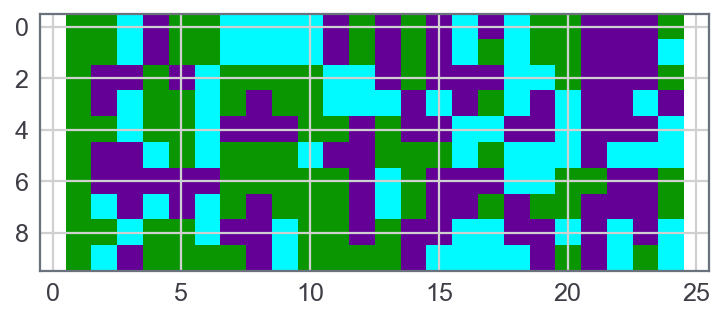

In [15]:
genome_display_10gen = displayRGB_generation(10, 10, generations)
_ = plt.imshow(np.swapaxes(genome_display_10gen,0,1))

Plotting the "Fitness vs Timestep" of the five most fit agents.

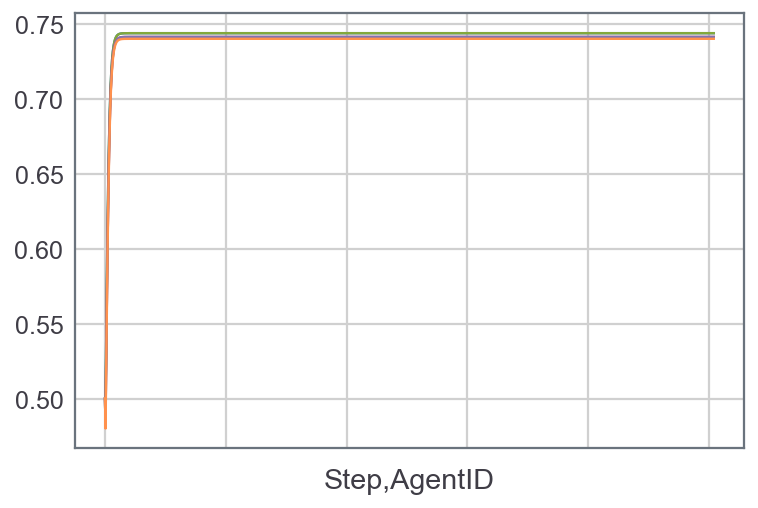

In [16]:
results_10gen_1st = abm_models[gen10_mostfit[0]].datacollector.get_agent_vars_dataframe()
results_10gen_2st = abm_models[gen10_mostfit[1]].datacollector.get_agent_vars_dataframe()
results_10gen_3rd = abm_models[gen10_mostfit[2]].datacollector.get_agent_vars_dataframe()
results_10gen_4th = abm_models[gen10_mostfit[3]].datacollector.get_agent_vars_dataframe()
results_10gen_5th = abm_models[gen10_mostfit[4]].datacollector.get_agent_vars_dataframe()
_ = results_10gen_1st.Fitness.plot()
_ = results_10gen_2st.Fitness.plot()
_ = results_10gen_3rd.Fitness.plot()
_ = results_10gen_4th.Fitness.plot()
_ = results_10gen_5th.Fitness.plot()

Dataframe of the 10th generation showing: 20 most fit agents, fitness in the last step and genome.

In [17]:
results.loc['10th'].nlargest(20,'fitness')

u_id   fitness  1  2  3  4  5  6  7  8 ... 15 16 17 18 19 20 21  \
individual                                         ...                        
091          990  0.743751  S  S  F  E  S  S  F  F ...  E  F  E  F  S  S  E   
095          994  0.743751  S  S  F  E  S  S  F  F ...  E  F  S  F  S  S  E   
038          937  0.741254  S  E  E  S  E  F  S  S ...  E  E  E  F  F  S  E   
098          997  0.741254  S  E  F  S  S  F  S  E ...  F  E  S  F  E  F  E   
024          923  0.740005  S  S  F  S  S  F  E  E ...  E  F  F  E  E  F  E   
034          933  0.740005  S  E  E  F  S  F  S  S ...  S  F  S  F  F  F  E   
089          988  0.740005  S  E  E  E  E  E  S  S ...  E  E  E  F  F  S  S   
015          914  0.736264  S  F  E  F  E  F  S  E ...  E  E  S  E  S  S  E   
025          924  0.736264  S  S  F  S  S  F  E  E ...  E  F  F  E  E  F  E   
029          928  0.736264  S  F  E  S  S  S  S  E ...  F  F  F  F  E  S  E   
033          932  0.736264  S  E  E  F  S  F  S  S ...  S  F  E  F  F  F  E   
042          941  0.732529  S  S  F  S  S  F  E  E ...  E  F  F  E  E  F  E   
052          951  0.732529  S  F  E  S  S  E  E  E ...  E  F  F  E  E  F  E   
054          953  0.730043  S  F  E  S  S  E  E  E ...  E  F  F  E  E  E  E   
058          957  0.728801  S  E  E  F  E  E  E  E ...  E  E  E  E  E  S  S   
082          981  0.726321  S  E  F  S  S  F  S  E ...  F  E  S  F  E  F  E   
008          907  0.725083  S  S  F  S  F  F  E  E ...  E  F  F  E  E  F  E   
073          972  0.720143  S  S  E  F  F  F  S  E ...  S  E  S  E  S  S  E   
057          956  0.718912  S  E  E  F  E  E  S  E ...  E  F  E  F  S  S  S   
013          912  0.714002  S  F  E  F  E  S  S  E ...  E  E  E  E  S  S  E   

           22 23 24  
individual           
091         E  E  S  
095         E  E  F  
038         E  E  S  
098         E  F  E  
024         E  E  F  
034         F  F  F  
089         E  E  S  
015         E  E  S  
025         F  E  F  
029         F  S  F  
033         F  F  F  
042         E  E  F  
052         S  E  F  
054         E  E  F  
058         E  E  S  
082         E  F  E  
008         E  E  F  
073         E  E  S  
057         E  E  S  
013         E  E  E  

[20 rows x 26 columns]